In [247]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Constants
DATA_DIR = 'lfw_funneled'
MIN_IMAGES_THRESHOLD = 30

data = []
labels = []
image_dimensions = [] 
num_images_per_person = [] 

for person in os.listdir(DATA_DIR):
    person_dir = os.path.join(DATA_DIR, person)
    if os.path.isdir(person_dir):
        images = []
        for filename in os.listdir(person_dir):
            if filename.lower().endswith('.jpg'):
                image_path = os.path.join(person_dir, filename)
                img = imread(image_path, as_gray=True)  # Load image as grayscale
                if img is not None:
                    # Convert image to numpy array and append to the 'images' list
                    img_array = np.array(img)
                    images.append(img_array.flatten())
                    
                    # Store image dimensions (height and width)
                    image_dimensions.append(img_array.shape)
            
        # Check if the person has minimum images required
        if len(images) >= MIN_IMAGES_THRESHOLD:
            num_images_per_person.append(len(images))
            data.extend(images) 
            labels.extend([person] * num_images_per_person[-1])


In [250]:
# store the path of the processed images

origin = "lfw_funneled/"
# get the length of duplicate elements in the list
from collections import Counter
d = Counter(labels)

image_path = []
key = []
value = []

# loop with the amount of d
for i in range(len(d)):
    # get the key of the dictionary
    key.append(list(d.keys())[i])
    # get the value of the dictionary
    value.append(list(d.values())[i])

for i in range(len(d)):
    for j in range(value[i]):
        # get the index of the key
        index = labels.index(key[i])

        # get the image path
        image_path.append(origin + key[i] + "/" + key[i] + "_" + "{:04d}".format(j+1) + ".jpg")

print(image_path)

['lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0001.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0002.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0003.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0004.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0005.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0006.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0007.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0008.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0009.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0010.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0011.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0012.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0013.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0014.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0015.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0016.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0017.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0018.jpg', 'lfw_funneled/Alvaro_Uribe/Alvaro_Uribe_0019.jpg', 'lfw_funneled/Alvaro_Uribe/Alv

In [251]:
import os
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for image_pat in image_path:
    image = cv2.imread(image_pat)
    
    subfolder = image_pat.split('/')[1] 
    dest_folder = os.path.join('processed_faces', subfolder)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    image_name = image_pat.split('/')[-1]
    
    faces = face_cascade.detectMultiScale(image, 1.1, 4)

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.resize(face, (128, 128)) 

        face_file = os.path.join(dest_folder, image_name)
        cv2.imwrite(face_file, face)

In [252]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Constants
DATA_DIR = 'processed_faces'

processed_data = []
processed_labels = []
image_dimensions = [] 
num_images_per_person = [] 

for person in os.listdir(DATA_DIR):
    person_dir = os.path.join(DATA_DIR, person)
    if os.path.isdir(person_dir):
        images = []
        for filename in os.listdir(person_dir):
            if filename.lower().endswith('.jpg'):
                image_path = os.path.join(person_dir, filename)
                img = imread(image_path, as_gray=True)  # Load image as grayscale
                if img is not None:
                    # Convert image to numpy array and append to the 'images' list
                    img_array = np.array(img)
                    images.append(img_array.flatten())
                    
                    # Store image dimensions (height and width)
                    image_dimensions.append(img_array.shape)

        processed_data.extend(images) 
        processed_labels.extend([person] * len(images))


In [253]:
# apply Standard Scaler

from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(processed_data)



In [254]:
# apply SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_std, processed_labels, test_size=0.2, random_state=42, stratify=processed_labels)

# # Define hyperparameter grid
# param_grid = {'C': [0.1, 1, 10],  
#               'gamma': [0.001, 0.01, 0.1],
#                 'kernel': [ 'poly', 'linear']}  

# # Create grid search object
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

#  # Run grid search
# grid.fit(X_train, y_train)

# Re-train SVM with best params


pca = PCA(n_components = 150).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(C=0.1, 
          gamma=0.001,
          kernel="linear",
          class_weight='balanced')

svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)

In [255]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test, digits=2))

                           precision    recall  f1-score   support

         Alejandro_Toledo       0.25      0.14      0.18        14
             Alvaro_Uribe       1.00      0.70      0.82        10
             Andre_Agassi       1.00      0.58      0.74        12
             Ariel_Sharon       0.73      0.58      0.65        19
    Arnold_Schwarzenegger       0.12      0.17      0.14         6
             Colin_Powell       0.83      0.81      0.82        48
            David_Beckham       0.17      0.25      0.20         4
          Donald_Rumsfeld       0.67      0.73      0.70        22
            George_W_Bush       0.82      0.80      0.81       109
        Gerhard_Schroeder       0.73      0.67      0.70        24
  Gloria_Macapagal_Arroyo       0.78      1.00      0.88         7
          Guillermo_Coria       0.83      0.83      0.83         6
                Hans_Blix       0.88      0.88      0.88         8
              Hugo_Chavez       0.57      0.53      0.55     

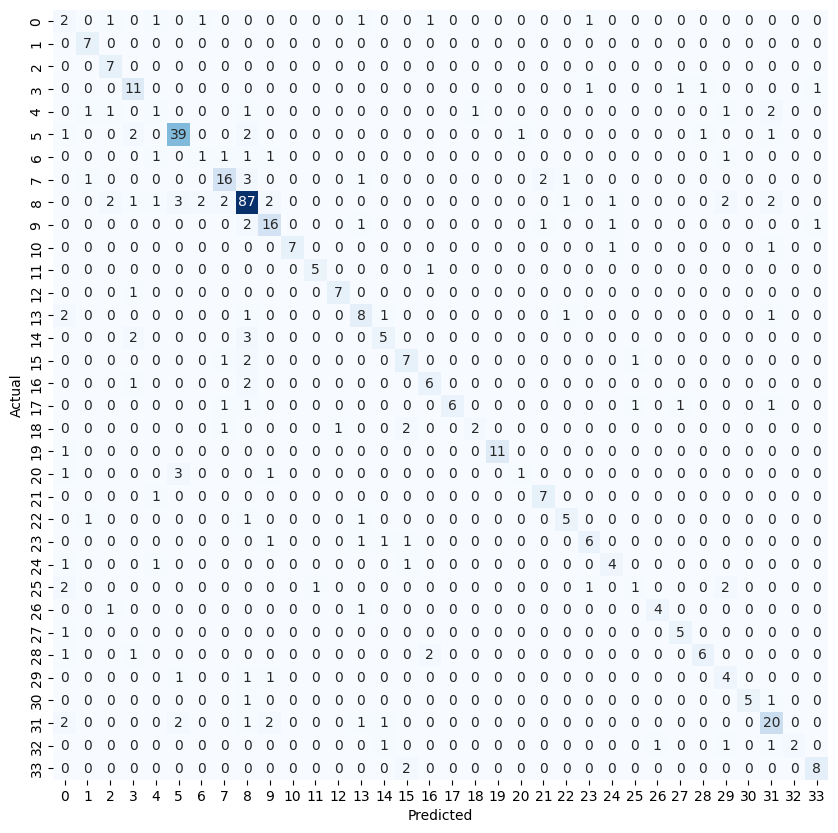

In [256]:
# Showing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [257]:
from colorama import Fore

incorrect = 0
length = len(y_pred)

print("Actual\t\t\t\tPredicted\n")

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        prediction_name = y_pred[i]  # Use the predicted label directly
        actual_name = y_test[i]  # Use the actual label directly
        incorrect += 1 
        print("{}\t\t\t{}".format(Fore.GREEN + actual_name, Fore.RED + prediction_name))

print("{} are classified as correct and {} are classified as incorrect!".format(length - incorrect, incorrect))


Actual				Predicted

Gloria_Macapagal_Arroyo			Tony_Blair
Serena_Williams			Jennifer_Capriati
Arnold_Schwarzenegger			Tony_Blair
George_W_Bush			Megawati_Sukarnoputri
Tom_Ridge			Tony_Blair
Donald_Rumsfeld			Lleyton_Hewitt
Donald_Rumsfeld			Laura_Bush
Donald_Rumsfeld			George_W_Bush
Hugo_Chavez			Lleyton_Hewitt
Jean_Chretien			George_W_Bush
Tony_Blair			Gerhard_Schroeder
Colin_Powell			Kofi_Annan
John_Ashcroft			Roh_Moo-hyun
Donald_Rumsfeld			Hugo_Chavez
Luiz_Inacio_Lula_da_Silva			Jean_Chretien
Jennifer_Capriati			George_W_Bush
Tony_Blair			Alejandro_Toledo
Tony_Blair			Colin_Powell
Arnold_Schwarzenegger			Silvio_Berlusconi
Kofi_Annan			Colin_Powell
Colin_Powell			George_W_Bush
Arnold_Schwarzenegger			John_Negroponte
Jacques_Chirac			George_W_Bush
Donald_Rumsfeld			Alvaro_Uribe
Kofi_Annan			Gerhard_Schroeder
Donald_Rumsfeld			Laura_Bush
Lleyton_Hewitt			Alvaro_Uribe
Serena_Williams			Alejandro_Toledo
Gerhard_Schroeder			Laura_Bush
Colin_Powell			Ariel_Sharon
Jean_Chretien			George_W_B

In [258]:
# testing accuracy by identity 
# to see if there is any bias in the dataset

from collections import defaultdict
import pandas as pd
from sklearn.metrics import accuracy_score

test_by_id = defaultdict(list)

for img, id in zip(X_test, y_test):
    test_by_id[id].append((img, id))

accuracy_by_id = {}

for id, test_set in test_by_id.items():
    X_id = [x[0] for x in test_set] 
    y_id = [x[1] for x in test_set]
    
    y_pred_id = svm.predict(X_id)
    acc = accuracy_score(y_id, y_pred_id)
    
    accuracy_by_id[id] = acc

num_imgs_by_id = {id:len(test_by_id[id]) for id in test_by_id}

ids_by_img_count = defaultdict(list)
for id, img_count in num_imgs_by_id.items():
    ids_by_img_count[img_count].append(id)

# Capture print output
records = []
for img_count, ids in ids_by_img_count.items():
    for id in ids:
        num_imgs = num_imgs_by_id[id]
        acc = accuracy_by_id[id]
        
        record = {
            "Identity": id,
            "Images": num_imgs,
            "Accuracy": acc
        }
        
        records.append(record)

# Create dataframe    
df = pd.DataFrame(records) 

df.head(20)

ValueError: X has 16384 features, but SVC is expecting 150 features as input.

In [267]:
image_path="processed_faces/Alejandro_Toledo/Alejandro_Toledo_0004.jpg"
image = imread(image_path, as_gray=True)

# Normalize the image
scaler = StandardScaler()
image_std = scaler.fit_transform(image)

# Reshape the image_std array to match the expected shape
image_std = image_std.reshape(1, -1)

# Apply PCA
image_pca = pca.transform(image_std[:, :16384])  # Use only the first 16384 features

# Make predictions
prediction = svm.predict(image_pca)

print(f"The predicted label for {image_path} is:", prediction)


The predicted label for processed_faces/Alejandro_Toledo/Alejandro_Toledo_0004.jpg is: ['Alejandro_Toledo']


In [271]:
import pickle

model_pkl_file = "face_detection.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(svm, file)

pca_pkl_file = "pca.pkl"

with open(pca_pkl_file, 'wb') as file:
    pickle.dump(pca, file)
